# EVN

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

# 단어 긍정(2), 중립(1), 부정(0) 분류 프로젝트

## 데이터

In [2]:
# 입력 문장
sentences = [
    '나는 오늘 기분이 좋아',
    '나는 오늘 우울해'
]

# 출력 정답
labels = [[1, 1, 1, 2],
          [1, 1, 0]]  # 긍정(2), 중립(1), 부정(0)

# 정답 dic
id_to_label = {0: '부정', 1: '중립', 2: '긍정'}

## Vocabulary

In [3]:
# 각 문장을 띄어쓰기 단위로 분할
words = []
for sentence in sentences:
    words.extend(sentence.split())
words

['나는', '오늘', '기분이', '좋아', '나는', '오늘', '우울해']

In [4]:
# 중복 단어 제거
words = list(dict.fromkeys(words))
words

['나는', '오늘', '기분이', '좋아', '우울해']

In [5]:
# 각 단어별 고유한 번호 부여
word_to_id = {'[PAD]': 0, '[UNK]': 1}
for word in words:
    word_to_id[word] = len(word_to_id)
word_to_id

{'[PAD]': 0, '[UNK]': 1, '기분이': 4, '나는': 2, '오늘': 3, '우울해': 6, '좋아': 5}

In [6]:
# 각 숫자별 단어 부여
id_to_word = {_id:word for word, _id in word_to_id.items()}
id_to_word

{0: '[PAD]', 1: '[UNK]', 2: '나는', 3: '오늘', 4: '기분이', 5: '좋아', 6: '우울해'}

## 모델 학습용 데이터 생성

In [7]:
# 학습용 입력 데이터 생성
train_inputs = []
for sentence in sentences:
    train_inputs.append([word_to_id[word] for word in sentence.split()])
train_inputs

[[2, 3, 4, 5], [2, 3, 6]]

In [8]:
# train label은 labels를 그래도 사용
train_labels = labels
train_labels

[[1, 1, 1, 2], [1, 1, 0]]

In [9]:
# train inputs을 numpy array로 변환
np.array(train_inputs)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


array([list([2, 3, 4, 5]), list([2, 3, 6])], dtype=object)

In [10]:
# train labels을 numpy array로 변환
np.array(train_labels)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


array([list([1, 1, 1, 2]), list([1, 1, 0])], dtype=object)

In [11]:
# 문장의 길이를 모두 동일하게 변경 (최대길이 4)
for row in train_inputs:
    row += [0] * (4 - len(row))
train_inputs

[[2, 3, 4, 5], [2, 3, 6, 0]]

In [12]:
# train inputs을 numpy array로 변환
train_inputs = np.array(train_inputs)
train_inputs

array([[2, 3, 4, 5],
       [2, 3, 6, 0]])

In [13]:
# 정답 길이를 모두 동일하게 변경 (최대길이 4)
for row in train_labels:
    row += [1] * (4 - len(row))
train_labels

[[1, 1, 1, 2], [1, 1, 0, 1]]

In [14]:
# 학습용 정답을 numpy array로 변환
train_labels = np.array(train_labels)
train_labels

array([[1, 1, 1, 2],
       [1, 1, 0, 1]])

## 모델링

In [15]:
# 입력 단어를 vector로 변환
embedding = tf.keras.layers.Embedding(len(word_to_id), 8)
hidden = embedding(train_inputs)
hidden

<tf.Tensor: shape=(2, 4, 8), dtype=float32, numpy=
array([[[ 4.3921862e-02, -3.1926084e-02,  1.8614937e-02, -3.9616704e-02,
         -1.4827132e-02,  1.7223392e-02,  4.7189061e-02, -4.2264350e-03],
        [-3.3060122e-02, -3.0932402e-02,  2.1288548e-02,  3.8696181e-02,
          8.0728643e-03, -3.4282625e-02, -4.8993614e-02,  3.9385114e-02],
        [-3.7011616e-03,  4.9343992e-02, -3.2282427e-02,  2.8595772e-02,
          3.3339892e-02,  1.8867962e-03,  4.7758806e-02, -1.2748577e-02],
        [ 3.7982490e-02,  4.7005203e-02,  4.6033729e-02,  3.3970606e-02,
          4.9579144e-03, -1.6786672e-02,  3.0289713e-02, -3.1454600e-02]],

       [[ 4.3921862e-02, -3.1926084e-02,  1.8614937e-02, -3.9616704e-02,
         -1.4827132e-02,  1.7223392e-02,  4.7189061e-02, -4.2264350e-03],
        [-3.3060122e-02, -3.0932402e-02,  2.1288548e-02,  3.8696181e-02,
          8.0728643e-03, -3.4282625e-02, -4.8993614e-02,  3.9385114e-02],
        [-1.8525898e-02, -8.2606450e-03,  2.8628562e-02, -3.89220

In [16]:
# embedding weight
weight = embedding.get_weights()[0]
weight

array([[-8.5938722e-05,  8.5103624e-03, -2.7748227e-02,  4.3837402e-02,
         4.7017802e-02, -3.1754695e-02,  9.9293701e-03, -2.9750515e-02],
       [ 2.9438522e-02,  3.9010528e-02,  7.1768053e-03,  1.2773085e-02,
         4.4327859e-02, -1.5636906e-03,  4.7028903e-02,  3.8631823e-02],
       [ 4.3921862e-02, -3.1926084e-02,  1.8614937e-02, -3.9616704e-02,
        -1.4827132e-02,  1.7223392e-02,  4.7189061e-02, -4.2264350e-03],
       [-3.3060122e-02, -3.0932402e-02,  2.1288548e-02,  3.8696181e-02,
         8.0728643e-03, -3.4282625e-02, -4.8993614e-02,  3.9385114e-02],
       [-3.7011616e-03,  4.9343992e-02, -3.2282427e-02,  2.8595772e-02,
         3.3339892e-02,  1.8867962e-03,  4.7758806e-02, -1.2748577e-02],
       [ 3.7982490e-02,  4.7005203e-02,  4.6033729e-02,  3.3970606e-02,
         4.9579144e-03, -1.6786672e-02,  3.0289713e-02, -3.1454600e-02],
       [-1.8525898e-02, -8.2606450e-03,  2.8628562e-02, -3.8922023e-02,
        -3.1681173e-03,  4.3224659e-02,  4.9969945e-02, -3

In [17]:
# numpy를 이용해서 직접 조회 (두 결과값 비교)
weight[train_inputs], hidden

(array([[[ 4.3921862e-02, -3.1926084e-02,  1.8614937e-02, -3.9616704e-02,
          -1.4827132e-02,  1.7223392e-02,  4.7189061e-02, -4.2264350e-03],
         [-3.3060122e-02, -3.0932402e-02,  2.1288548e-02,  3.8696181e-02,
           8.0728643e-03, -3.4282625e-02, -4.8993614e-02,  3.9385114e-02],
         [-3.7011616e-03,  4.9343992e-02, -3.2282427e-02,  2.8595772e-02,
           3.3339892e-02,  1.8867962e-03,  4.7758806e-02, -1.2748577e-02],
         [ 3.7982490e-02,  4.7005203e-02,  4.6033729e-02,  3.3970606e-02,
           4.9579144e-03, -1.6786672e-02,  3.0289713e-02, -3.1454600e-02]],
 
        [[ 4.3921862e-02, -3.1926084e-02,  1.8614937e-02, -3.9616704e-02,
          -1.4827132e-02,  1.7223392e-02,  4.7189061e-02, -4.2264350e-03],
         [-3.3060122e-02, -3.0932402e-02,  2.1288548e-02,  3.8696181e-02,
           8.0728643e-03, -3.4282625e-02, -4.8993614e-02,  3.9385114e-02],
         [-1.8525898e-02, -8.2606450e-03,  2.8628562e-02, -3.8922023e-02,
          -3.1681173e-03,  4.

In [18]:
# 단어의 vector를 이용해서 긍정(2), 부정(0), 중립(1) 확률값 예측
linear = tf.keras.layers.Dense(3, activation=tf.nn.softmax)
outputs = linear(hidden)
outputs

<tf.Tensor: shape=(2, 4, 3), dtype=float32, numpy=
array([[[0.320077  , 0.3356486 , 0.34427434],
        [0.33441597, 0.347464  , 0.31812   ],
        [0.34359318, 0.3128013 , 0.34360546],
        [0.3391343 , 0.31859624, 0.3422694 ]],

       [[0.320077  , 0.3356486 , 0.34427434],
        [0.33441597, 0.347464  , 0.31812   ],
        [0.31293696, 0.33743626, 0.3496268 ],
        [0.338493  , 0.31683317, 0.34467384]]], dtype=float32)>

In [19]:
# dense의 wieght, bias
weight, bias = linear.get_weights()
weight, bias

(array([[ 0.15388703, -0.47517037,  0.2103594 ],
        [ 0.5846295 , -0.4863936 , -0.36874127],
        [-0.4064993 ,  0.34616607,  0.01876104],
        [-0.09272522, -0.6404222 , -0.1042245 ],
        [-0.51685524, -0.6192719 ,  0.21838051],
        [-0.2138555 ,  0.05035412,  0.69781   ],
        [-0.47504607, -0.4965774 ,  0.00800955],
        [ 0.48223633,  0.44033426, -0.46235183]], dtype=float32),
 array([0., 0., 0.], dtype=float32))

In [20]:
# numpy를 이용한 xW + b
logits = np.matmul(hidden, weight) + bias
logits

array([[[-0.03627437,  0.01122878,  0.03660287],
        [ 0.01001277,  0.04828816, -0.03994415],
        [-0.00772124, -0.10161139, -0.00768551],
        [-0.01706713, -0.0795387 , -0.00786521]],

       [[-0.03627437,  0.01122878,  0.03660287],
        [ 0.01001277,  0.04828816, -0.03994415],
        [-0.06246989,  0.012905  ,  0.04839471],
        [-0.02439718, -0.09052514, -0.00630195]]], dtype=float32)

In [21]:
# softmax 계산을 위한 준비 exp(x') / sum(exp(x))
numerator = np.exp(logits)
denominator = np.sum(numerator, axis=2, keepdims=True)
numerator, denominator

(array([[[0.9643757 , 1.0112921 , 1.037281  ],
         [1.010063  , 1.049473  , 0.96084315],
         [0.9923085 , 0.9033805 , 0.9923439 ],
         [0.98307765, 0.92354226, 0.9921656 ]],
 
        [[0.9643757 , 1.0112921 , 1.037281  ],
         [1.010063  , 1.049473  , 0.96084315],
         [0.9394413 , 1.0129886 , 1.0495849 ],
         [0.975898  , 0.9134514 , 0.9937179 ]]], dtype=float32),
 array([[[3.0129488],
         [3.020379 ],
         [2.888033 ],
         [2.8987856]],
 
        [[3.0129488],
         [3.020379 ],
         [3.0020146],
         [2.8830674]]], dtype=float32))

In [22]:
# 두 결과값 비교
probs = numerator / denominator
probs, outputs

(array([[[0.32007703, 0.33564863, 0.34427437],
         [0.334416  , 0.34746403, 0.31812006],
         [0.3435932 , 0.31280133, 0.34360546],
         [0.3391343 , 0.31859627, 0.34226942]],
 
        [[0.32007703, 0.33564863, 0.34427437],
         [0.334416  , 0.34746403, 0.31812006],
         [0.31293696, 0.33743626, 0.34962684],
         [0.33849296, 0.31683317, 0.34467384]]], dtype=float32),
 <tf.Tensor: shape=(2, 4, 3), dtype=float32, numpy=
 array([[[0.320077  , 0.3356486 , 0.34427434],
         [0.33441597, 0.347464  , 0.31812   ],
         [0.34359318, 0.3128013 , 0.34360546],
         [0.3391343 , 0.31859624, 0.3422694 ]],
 
        [[0.320077  , 0.3356486 , 0.34427434],
         [0.33441597, 0.347464  , 0.31812   ],
         [0.31293696, 0.33743626, 0.3496268 ],
         [0.338493  , 0.31683317, 0.34467384]]], dtype=float32)>)

In [25]:
def build_model(n_vocab, d_model, n_seq, n_out):
    """
    동작만 하는 간단한 모델
    :param n_vocab: vocabulary 단어 수
    :param d_model: 단어를 의미하는 벡터의 차원 수
    :param n_seq: 문장길이 (단어 수)
    :param n_out: 예측할 class 개수
    """
    inputs = tf.keras.layers.Input((n_seq,))  # (bs, n_seq)
    # 입력 단어를 vector로 변환
    embedding = tf.keras.layers.Embedding(n_vocab, d_model)
    hidden = embedding(inputs)  # (bs, n_seq, d_model)
    #######################################
    # 여기에 CNN 및 RNN 모델을 추가해 보세요.
    conv = tf.keras.layers.Conv1D(filters = 128, kernel_size = 3, padding = 'causal')
    hidden = conv(hidden)
    rnn = tf.keras.layers.SimpleRNN(units = 128, return_sequences = True)
    hidden = rnn(hidden)
    #######################################
    # 단어의 vector를 이용해서 정답 확률값 예측
    linear = tf.keras.layers.Dense(n_out, activation=tf.nn.softmax)
    outputs = linear(hidden)  # (bs, n_seq, n_out)
    # 학습할 모델 선언
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    return model

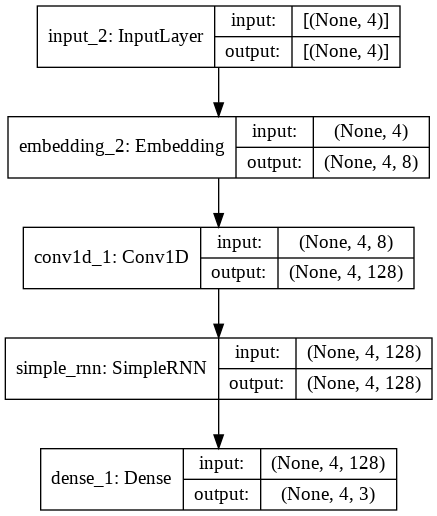

In [26]:
# 모델 생성
model = build_model(len(word_to_id), 8, 4, 3)
# 모델 내용 그래프 출력
tf.keras.utils.plot_model(model, 'model.png', show_shapes=True)

## 학습

In [27]:
# 모델 loss, optimizer, metric 정의
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [28]:
# 모델 학습
history = model.fit(train_inputs, train_labels, epochs=100, batch_size=16)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 1.0941 - accuracy: 0.2500
Epoch 2/100
1/1 [==============================] - 0s 5ms/step - loss: 1.0661 - accuracy: 0.8750
Epoch 3/100
1/1 [==============================] - 0s 3ms/step - loss: 1.0378 - accuracy: 0.7500
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 1.0081 - accuracy: 0.7500
Epoch 5/100
1/1 [==============================] - 0s 4ms/step - loss: 0.9764 - accuracy: 0.7500
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 0.9424 - accuracy: 0.7500
Epoch 7/100
1/1 [==============================] - 0s 7ms/step - loss: 0.9065 - accuracy: 0.7500
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 0.8697 - accuracy: 0.7500
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 0.8334 - accuracy: 0.7500
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 0.7990 - accuracy: 0.7500
Epoch 11/100
1/1 [============

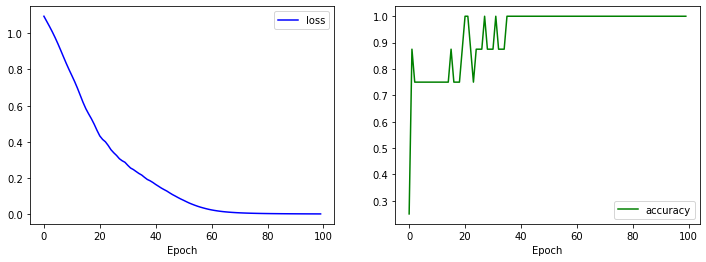

In [29]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.show()

## 평가

In [30]:
# 모델 평가
model.evaluate(train_inputs, train_labels)

1/1 [==============================] - 0s 306ms/step - loss: 0.0017 - accuracy: 1.0000


[0.0017198247369378805, 1.0]

## 예측

In [31]:
# 추론할 입력
string = '나는 기분이 우울해'

In [32]:
# 입력을 숫자로 변경
infer_input = [word_to_id[word] for word in string.split()]
infer_input

[2, 4, 6]

In [33]:
# 문장의 길이를 모두 동일하게 변경 (최대길이 4)
infer_input += [0] * (4 - len(infer_input))
infer_input

[2, 4, 6, 0]

In [34]:
# numpy array 변환 (batch size 1 추가)
infer_inputs = np.array([infer_input])
infer_inputs

array([[2, 4, 6, 0]])

In [35]:
# 긍정/부정 추론
y_preds = model.predict(infer_inputs)
y_preds

array([[[1.7523626e-04, 9.9942267e-01, 4.0211793e-04],
        [1.3023313e-05, 9.9997258e-01, 1.4410298e-05],
        [9.9558854e-01, 3.1564149e-04, 4.0957807e-03],
        [3.5732276e-07, 9.9912781e-01, 8.7180670e-04]]], dtype=float32)

In [36]:
# 확률의 max 값을 추론 값으로 결정
y_pred_class = np.argmax(y_preds, axis=2)
y_pred_class

array([[1, 1, 0, 1]])

In [37]:
# 각 예측 값에 대한 label string
for row in y_pred_class:
    for val in row:
        print(val, ':', id_to_label[val])

1 : 중립
1 : 중립
0 : 부정
1 : 중립


# 문장 긍정(1), 부정(0) 분류 프로젝트

## 데이터

In [38]:
# 입력 문장
sentences = [
    '나는 오늘 기분이 좋아',
    '나는 오늘 우울해'
]

# 출력 정답
labels = [1, 0]  # 긍정(1), 부정(0)

# 정답 dic
id_to_label = {0: '부정', 1: '긍정'}

## Vocabulary

In [39]:
# 각 문장을 띄어쓰기 단위로 분할
words = []
for sentence in sentences:
    words.extend(sentence.split())
words

['나는', '오늘', '기분이', '좋아', '나는', '오늘', '우울해']

In [40]:
# 중복 단어 제거
words = list(dict.fromkeys(words))
words

['나는', '오늘', '기분이', '좋아', '우울해']

In [41]:
# 각 단어별 고유한 번호 부여
word_to_id = {'[PAD]': 0, '[UNK]': 1}
for word in words:
    word_to_id[word] = len(word_to_id)
word_to_id

{'[PAD]': 0, '[UNK]': 1, '기분이': 4, '나는': 2, '오늘': 3, '우울해': 6, '좋아': 5}

In [42]:
# 각 숫자별 단어 부여
id_to_word = {_id:word for word, _id in word_to_id.items()}
id_to_word

{0: '[PAD]', 1: '[UNK]', 2: '나는', 3: '오늘', 4: '기분이', 5: '좋아', 6: '우울해'}

## 모델 학습용 데이터 생성

In [43]:
# 학습용 입력 데이터 생성
train_inputs = []
for sentence in sentences:
    train_inputs.append([word_to_id[word] for word in sentence.split()])
train_inputs

[[2, 3, 4, 5], [2, 3, 6]]

In [44]:
# train label은 labels를 그래도 사용
train_labels = labels
train_labels

[1, 0]

In [45]:
# 문장의 길이를 모두 동일하게 변경 (최대길이 4)
for row in train_inputs:
    row += [0] * (4 - len(row))
train_inputs

[[2, 3, 4, 5], [2, 3, 6, 0]]

In [46]:
# train inputs을 numpy array로 변환
train_inputs = np.array(train_inputs)
train_inputs

array([[2, 3, 4, 5],
       [2, 3, 6, 0]])

In [47]:
# 학습용 정답을 numpy array로 변환
train_labels = np.array(train_labels)
train_labels

array([1, 0])

## 모델링

In [48]:
# 입력 단어를 vector로 변환
embedding = tf.keras.layers.Embedding(len(word_to_id), 8)
hidden = embedding(train_inputs)
hidden

<tf.Tensor: shape=(2, 4, 8), dtype=float32, numpy=
array([[[ 0.00618351,  0.02914479, -0.02239823,  0.01288647,
          0.03784368,  0.00767053,  0.04218526,  0.00894254],
        [ 0.03645216,  0.00040058,  0.0045697 , -0.03905439,
          0.02355916,  0.04799999,  0.02102634,  0.02976242],
        [ 0.02917488,  0.01284944,  0.02607046,  0.0436408 ,
          0.03522598,  0.02660191, -0.02109619, -0.03240861],
        [-0.02471348, -0.012476  , -0.00940726,  0.02393789,
         -0.00015629,  0.0465124 , -0.04437491, -0.01646559]],

       [[ 0.00618351,  0.02914479, -0.02239823,  0.01288647,
          0.03784368,  0.00767053,  0.04218526,  0.00894254],
        [ 0.03645216,  0.00040058,  0.0045697 , -0.03905439,
          0.02355916,  0.04799999,  0.02102634,  0.02976242],
        [-0.02028235,  0.0323596 ,  0.00908183,  0.02311369,
          0.01608158,  0.02493036,  0.01871594, -0.04569436],
        [-0.0118859 , -0.01985946, -0.03248124, -0.0076112 ,
         -0.04066669, -0.

In [49]:
# 각 단어 벡터의 최대값 기준으로 벡터를 더해서 차원을 줄여줌 (문장 vector 생성)
pool = tf.keras.layers.GlobalMaxPool1D()
hidden_pool = pool(hidden)
hidden_pool

<tf.Tensor: shape=(2, 8), dtype=float32, numpy=
array([[0.03645216, 0.02914479, 0.02607046, 0.0436408 , 0.03784368,
        0.04799999, 0.04218526, 0.02976242],
       [0.03645216, 0.0323596 , 0.00908183, 0.02311369, 0.03784368,
        0.04799999, 0.04218526, 0.02976242]], dtype=float32)>

In [50]:
# 문장 vector를 이용해서 긍정(1), 부정(0) 확률값 예측
linear = tf.keras.layers.Dense(2, activation=tf.nn.softmax)
outputs = linear(hidden_pool)
outputs

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[0.5100968 , 0.48990324],
       [0.5078236 , 0.4921764 ]], dtype=float32)>

In [52]:
def build_model(n_vocab, d_model, n_seq, n_out):
    """
    동작만 하는 간단한 모델
    :param n_vocab: vocabulary 단어 수
    :param d_model: 단어를 의미하는 벡터의 차원 수
    :param n_seq: 문장길이 (단어 수)
    :param n_out: 예측할 class 개수
    """
    inputs = tf.keras.layers.Input((n_seq,))  # (bs, n_seq)
    # 입력 단어를 vector로 변환
    embedding = tf.keras.layers.Embedding(n_vocab, d_model)
    hidden = embedding(inputs)  # (bs, n_seq, d_model)
    #######################################
    # 여기에 CNN 및 RNN 모델을 추가해 보세요.
    conv_1 = tf.keras.layers.Conv1D(filters=128, kernel_size=3, padding='causal')
    hidden = conv_1(hidden)
    conv_2 = tf.keras.layers.Conv1D(filters=64, kernel_size=3)
    hidden = conv_2(hidden)
    
    rnn_1 = tf.keras.layers.SimpleRNN(units = 128, return_sequences = True)
    hidden = rnn_1(hidden)
    rnn_2 = tf.keras.layers.SimpleRNN(units = 256, return_sequences = True)
    hidden = rnn_2(hidden)
    #######################################
    # 각 단어 벡터의 최대값 기준으로 벡터를 더해서 차원을 줄여줌 (문장 vector 생성)
    pool = tf.keras.layers.GlobalMaxPool1D()
    hidden_pool = pool(hidden)  # (bs, d_model)
    # 문장 vector를 이용해서 긍정(1), 부정(0) 확률값 예측
    linear = tf.keras.layers.Dense(2, activation=tf.nn.softmax)
    outputs = linear(hidden_pool)  # (bs, n_out)
    # 학습할 모델 선언
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    return model

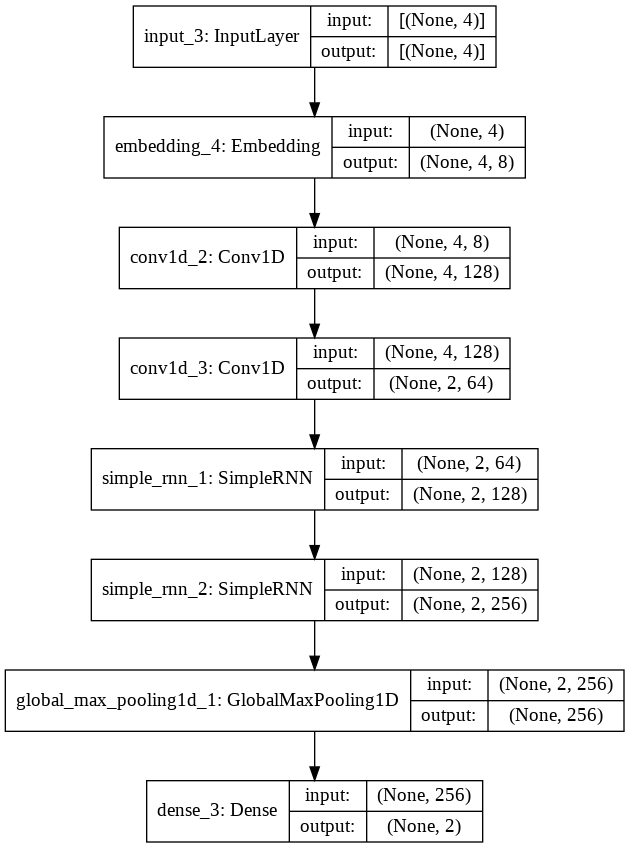

In [53]:
# 모델 생성
model = build_model(len(word_to_id), 8, 4, 2)
# 모델 내용 그래프 출력
tf.keras.utils.plot_model(model, 'model.png', show_shapes=True)

## 학습

In [54]:
# 모델 loss, optimizer, metric 정의
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [55]:
# 모델 학습
history = model.fit(train_inputs, train_labels, epochs=20, batch_size=16)

Epoch 1/20
1/1 [==============================] - 2s 2s/step - loss: 0.6936 - accuracy: 0.5000
Epoch 2/20
1/1 [==============================] - 0s 9ms/step - loss: 0.6753 - accuracy: 1.0000
Epoch 3/20
1/1 [==============================] - 0s 8ms/step - loss: 0.6566 - accuracy: 1.0000
Epoch 4/20
1/1 [==============================] - 0s 9ms/step - loss: 0.6356 - accuracy: 1.0000
Epoch 5/20
1/1 [==============================] - 0s 9ms/step - loss: 0.6095 - accuracy: 1.0000
Epoch 6/20
1/1 [==============================] - 0s 10ms/step - loss: 0.5765 - accuracy: 1.0000
Epoch 7/20
1/1 [==============================] - 0s 9ms/step - loss: 0.5378 - accuracy: 1.0000
Epoch 8/20
1/1 [==============================] - 0s 15ms/step - loss: 0.4907 - accuracy: 1.0000
Epoch 9/20
1/1 [==============================] - 0s 7ms/step - loss: 0.4349 - accuracy: 1.0000
Epoch 10/20
1/1 [==============================] - 0s 10ms/step - loss: 0.3719 - accuracy: 1.0000
Epoch 11/20
1/1 [====================

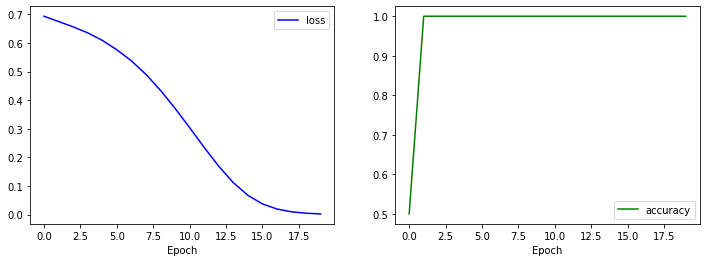

In [56]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.show()

## 평가

In [57]:
# 모델 평가
model.evaluate(train_inputs, train_labels)

1/1 [==============================] - 0s 322ms/step - loss: 0.0012 - accuracy: 1.0000


[0.0012058474821969867, 1.0]

## 예측

In [58]:
# 추론할 입력
string = '나는 기분이 우울해'

In [59]:
# 입력을 숫자로 변경
infer_input = [word_to_id[word] for word in string.split()]
infer_input

[2, 4, 6]

In [60]:
# 문장의 길이를 모두 동일하게 변경 (최대길이 4)
infer_input += [0] * (4 - len(infer_input))
infer_input

[2, 4, 6, 0]

In [61]:
# numpy array 변환 (batch size 1 추가)
infer_inputs = np.array([infer_input])
infer_inputs

array([[2, 4, 6, 0]])

In [62]:
# 긍정/부정 추론
y_preds = model.predict(infer_inputs)
y_preds

array([[0.9949661 , 0.00503385]], dtype=float32)

In [63]:
# 확률의 max 값을 추론 값으로 결정
y_pred_class = np.argmax(y_preds, axis=1)
y_pred_class

array([0])

In [64]:
# 각 예측 값에 대한 label string
for val in y_pred_class:
    print(val, ':', id_to_label[val])

0 : 부정
